# Before you start :
   - These exercises are related to the Pivot table and correlation lessons.
   - Keep in mind that you need to use some of the functions you learned in the previous lessons.
   - Elaborate your codes and outputs as much as you can.
   - Try your best to answer the questions and complete the tasks and most importantly enjoy the process!!!
  
#### Import all the necessary libraries here:


In [97]:
# Libraries
import os
import pandas as pd
import numpy as np
import matplotlib as plt


# Challenge 1

#### Read the `employees` dataset from Ironhack's database:
* db: `employees`
* table: `employees`

Save your data in a variable called `employees`.

In [4]:
# your code here
employees = pd.read_csv("../data/employees.csv")

In [6]:
employees = employees.drop(["Unnamed: 0"], axis=1)

In [7]:
employees.head()

,Name,Department,Education,Gender,Title,Years,Salary
0,Jose,IT,Bachelor,M,analyst,1,35
1,Maria,IT,Master,F,analyst,2,30
2,David,HR,Master,M,analyst,2,30
3,Sonia,HR,Bachelor,F,analyst,4,35
4,Samuel,Sales,Master,M,associate,3,55


#### What's the mean `Salary` by `Department`?
**Tip**: There are 2 ways to do it: with or without pivot tables. Do it both ways. 

In [8]:
# Method 1
# your code here
employees.groupby(["Department"])["Salary"].mean()

Department
HR       45.00
IT       48.75
Sales    55.00
Name: Salary, dtype: float64

In [9]:
# Method 2
# your code here
employees.pivot_table(index=["Department"], values=["Salary"])

,Salary
Department,
HR,45.00
IT,48.75
Sales,55.00


#### Now, group the data by more than one column. Use Pandas pivot table function to select the mean `Salary` by `Department` and `Title`.

In [10]:
# your code here
employees.pivot_table(index=["Department", "Title"], values=["Salary"])

Salary
Department Title            
HR         VP           70.0
           analyst      32.5
IT         VP           70.0
           analyst      32.5
           associate    60.0
Sales      associate    55.0

#### Display the number of `Years` of work experience and the `Salary` for each `Title`. Add `Years` as a column in your pivot table.
**Hint**: Use Pandas documentation to explore the [pivot table](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.pivot_table.html) function.

In [50]:
# your code here
employees.pivot_table(index=["Title"], values=["Salary", "Name"], aggfunc={"Salary":"mean", "Name":"count"}, fill_value=0)

,Name,Salary
Title,,
VP,2,70.000000
analyst,4,32.500000
associate,3,56.666667


#### Find the mean `Salary` and number of employees in each `Department` and for each job `Title`.

In [57]:
# your code here
employees.pivot_table(index=["Department", "Title"], values=["Salary", "Name"], aggfunc={"Salary":"mean", "Name":"count"}, fill_value=0).rename(columns={"Name":"Number employees"})

Number employees  Salary
Department Title                              
HR         VP                        1    70.0
           analyst                   2    32.5
IT         VP                        1    70.0
           analyst                   2    32.5
           associate                 1    60.0
Sales      associate                 2    55.0

#### For each `Department` and each job `Title`, find the `Salary` median, minimum, maximum and standard deviation. Comment your results.

In [43]:
# your code here
employees.pivot_table(index=["Department", "Title"], values=["Salary"], aggfunc=[np.median, np.min, np.max, np.std])

median   amin   amax       std
                     Salary Salary Salary    Salary
Department Title                                   
HR         VP          70.0     70     70       NaN
           analyst     32.5     30     35  3.535534
IT         VP          70.0     70     70       NaN
           analyst     32.5     30     35  3.535534
           associate   60.0     60     60       NaN
Sales      associate   55.0     55     55  0.000000

In [ ]:
"""
On a quick glance to the dataframe above, one could say that the salary seems to be similar among departments.
The differences are rather found in job title within departments. VP>Associate>Analyst

"""

#### Based on your comments, fill the missing values with an appropriate value.

In [48]:
# your code here
employees.pivot_table(index=["Department"], columns=["Title"], values=["Salary"], fill_value=0, aggfunc=[np.median, np.min, np.max, np.std])

median                     amin                     amax          \
           Salary                   Salary                   Salary           
Title          VP analyst associate     VP analyst associate     VP analyst   
Department                                                                    
HR             70    32.5         0     70      30         0     70      35   
IT             70    32.5        60     70      30        60     70      35   
Sales           0     0.0        55      0       0        55      0       0   

                           std            
                        Salary            
Title      associate   analyst associate  
Department                                
HR                 0  3.535534         0  
IT                60  3.535534         0  
Sales             55  0.000000         0

#### The stake holders want to know, for each `Department`, the number of employees and how much money is spent on salaries. Could you provide that information? 

In [56]:
# your code here
employees.pivot_table(index=["Department"], values=["Name", "Salary"], aggfunc={"Name":"count", "Salary":"sum"}).rename(columns={"Name":"Number employees"})

,Number employees,Salary
Department,,
HR,3,135
IT,4,195
Sales,2,110


#### For each `Department` and `Title`, find the the total years of work experience and the mean `Salary`.

In [60]:
# your code here
employees.pivot_table(index=["Department"], columns= ["Title"], values=["Years"], fill_value=0, aggfunc="sum")

Years                  
Title         VP analyst associate
Department                        
HR             8       6         0
IT             8       3         7
Sales          0       0         5

## Bonus Challenge 1

#### Compute the mean `Salary` after removing the maximum `Salary` for each `Department`. Create the appropriate pivot table.
**Hint**: Write a custom function.

In [73]:
# your code here
employees.pivot_table(index=["Department"], values=["Salary"], aggfunc="max")

,Salary
Department,
HR,70
IT,70
Sales,55


In [81]:
max_HR=employees[(employees["Department"]=="HR") & (employees["Salary"]==70)].index
max_IT=employees[(employees["Department"]=="IT") & (employees["Salary"]==70)].index
max_Sales=employees[(employees["Department"]=="Sales") & (employees["Salary"]==55)].index

In [82]:
max_HR

Int64Index([8], dtype='int64')

In [83]:
max_IT

Int64Index([6], dtype='int64')

In [84]:
max_Sales

Int64Index([4, 5], dtype='int64')

In [87]:
employees_wo_most_paid = employees.drop(max_HR)


In [90]:
employees_wo_most_paid = employees.drop(max_IT)

In [91]:
employees_wo_most_paid.pivot_table(index=["Department"], values=["Salary"])

,Salary
Department,
HR,45.000000
IT,41.666667
Sales,55.000000


In [ ]:
# I am not removing the Sales employees with the maximum salary, otherwise there will not be employees of that
# department left.

# Challenge 2

#### Read the `fitbit` dataset from Ironhack's database:
* db: `fitbit`
* table: `fitbit`

Save your data in a variable called `fitbit`.

In [92]:
# your code here
fitbit = pd.read_csv("../data/fitbit.csv")

#### Explore you dataset in terms of data types and descriptive statistics.
**Hint**: Use Pandas functions from previous lectures.

In [93]:
# your code here
fitbit.describe()

,Unnamed: 0,Calorie burned,Steps,Distance,Floors,Minutes Sedentary,Minutes Lightly Active,Minutes Fairly Active,Minutes Very Active,Activity Calories,...,NumberOfAwakings,LengthOfRestInMinutes,Distance_miles,Days_encoded,Work_or_Weekend,Hours Sleep,Sleep efficiency,Yesterday_sleep,Yesterday_sleep_efficiency,Months_encoded
count,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,...,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000
mean,183.000000,2741.501362,10121.588556,8.549128,11.724796,563.934482,236.405995,26.163488,35.722071,2044.147139,...,16.196185,321.343324,5.312180,3.010899,0.713896,4.841326,76.362799,4.818529,76.119842,6.501362
std,106.088014,916.307036,5594.836225,3.409881,10.337370,294.793145,86.531376,20.319456,31.006682,2041.267168,...,10.757622,170.786726,2.118801,1.998604,0.452555,2.579205,32.973194,2.584930,33.206279,3.459267
min,0.000000,179.000000,0.000000,0.000000,0.000000,1.002000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,91.500000,2698.000000,6730.500000,6.155000,5.000000,520.000000,179.000000,8.000000,10.500000,1218.500000,...,7.000000,248.000000,3.824539,1.000000,0.000000,3.733333,86.238532,3.725000,86.233673,3.500000
50%,183.000000,2974.000000,10413.000000,8.290000,11.000000,663.000000,226.000000,24.000000,29.000000,1553.000000,...,16.000000,370.000000,5.151166,3.000000,1.000000,5.616667,89.433962,5.600000,89.433962,7.000000
75%,274.500000,3233.000000,13916.500000,10.560000,16.000000,756.500000,290.000000,41.500000,54.000000,1927.500000,...,24.000000,440.500000,6.561678,5.000000,1.000000,6.675000,92.438419,6.650000,92.438419,9.500000
max,366.000000,4351.000000,26444.000000,20.450000,101.000000,998.000000,472.000000,101.000000,153.000000,9830.000000,...,45.000000,607.000000,12.707037,6.000000,1.000000,9.216667,100.000000,9.216667,100.000000,12.000000


In [94]:
fitbit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 25 columns):
Unnamed: 0                    367 non-null int64
Date                          367 non-null object
Calorie burned                367 non-null int64
Steps                         367 non-null int64
Distance                      367 non-null float64
Floors                        367 non-null int64
Minutes Sedentary             367 non-null float64
Minutes Lightly Active        367 non-null int64
Minutes Fairly Active         367 non-null int64
Minutes Very Active           367 non-null int64
Activity Calories             367 non-null int64
MinutesOfSleep                367 non-null int64
MinutesOfBeingAwake           367 non-null int64
NumberOfAwakings              367 non-null int64
LengthOfRestInMinutes         367 non-null int64
Distance_miles                367 non-null float64
Days                          367 non-null object
Days_encoded                  367 non-null float64
Wor

#### You suspect that there must be a linear relationship between the `Minutes Very Active` and the `Steps`. Compute the correlation between these variables.

In [101]:
# your code here

fitbit["Minutes Very Active"].corr(fitbit["Steps"])

0.5714518481062608

#### Use matplotlib to visually plot `Minutes Very active` vs `Steps`. We'll work with matplotlib next week. As a first introduction, uncomment and complete the following code. You need to replace the # symbol for the correct function arguments. 

In [98]:
import matplotlib.pyplot as plt

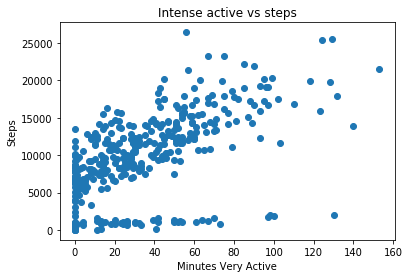

In [110]:

plt.scatter(fitbit["Minutes Very Active"], fitbit["Steps"])
plt.title("Intense active vs steps")
plt.xlabel("Minutes Very Active")
plt.ylabel("Steps")
plt.show()


#### What can you say about `Minutes Very Active` and `Steps`? Write a comment below.

In [ ]:
"""
There is a positive linear correlation between both variables. It means that the days that, whomever the 
calories tracker belongs to, would go out and walk, would also have in general quite minutes very active. 
In fact, the more steps, the more minuts that the tracker considers very active.
We don't have any cause-effect here, just a linear association between 2 variables.
"""

#### We also suspect that there must be a linear relationship between the `Minutes Sedentary` and the `Steps`. Compute the correlation between these variables.

In [107]:
# your code here
fitbit["Minutes Sedentary"].corr(fitbit["Steps"])

0.07690608062990094

#### Use matplotlib to visually plot `Minutes Sedentary` vs `Steps`. Based on the results of the computed correlation and the plot, what can you say about these 2 variables?

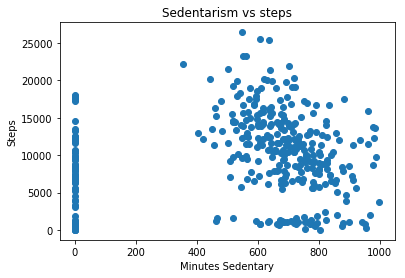

In [112]:
# your code here
plt.scatter(fitbit["Minutes Sedentary"], fitbit["Steps"])
plt.title("Sedentarism vs steps")
plt.xlabel("Minutes Sedentary")
plt.ylabel("Steps")
plt.show()

In [ ]:
"""
Close to no correlation between steps and minutes sedentary. It means, it is feasible to go out and walk, to the office
for instance, and still have many sedentary minutes in the day. The other is also true. One can be home, and while 
not walking many steps, still have few sedentary minutes in the day (cleaning, DIY tasks, painting...)
"""

#### We also suspect that there must be a linear relationship between the `MinutesOfSleep` and the `Steps`. Compute the correlation between these variables.

In [113]:
# your code here
fitbit["MinutesOfSleep"].corr(fitbit["Steps"])

0.13098565950836383

#### Use matplotlib to visually plot `MinutesOfSleep` vs `Steps`. Based on the results of the computed correlation and the plot, what can you say about these 2 variables?

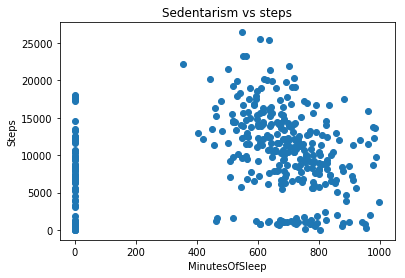

In [114]:
# your code here
plt.scatter(fitbit["Minutes Sedentary"], fitbit["Steps"])
plt.title("Sedentarism vs steps")
plt.xlabel("MinutesOfSleep")
plt.ylabel("Steps")
plt.show()

In [ ]:
"""
There is certain positive linear relationship, but not much. One could think a theoretical strong negative
linear relationship. Imagine a extreme example where one spend the whole day sleeping resting, then the amount of
steps, because of obvious time limitations in the day, would lesser and lesser, so negative correlation.
But since almost nobody usually does this, one can sleep a lot of hours, say 12 hours, and still be walking out 
the rest of the day. And the other is also possible, one can sleep not much, say 3-4 hours, and stay home the
rest of the day, hence not cummulating steps that day. The almost non existent linear relationship makes sense to me.
"""

#### Select a subset of your dataset with the columns below and compute the correlation matrix. Save the results in the variable `cor_fit`.

In [117]:
columns = ['Calorie burned', 'Steps', 'Floors', 'Minutes Sedentary', 'Minutes Very Active', 'MinutesOfSleep']

In [126]:
cor_fit = fitbit[columns].corr().sort_values('Steps', ascending=False)
cor_fit

,Calorie burned,Steps,Floors,Minutes Sedentary,Minutes Very Active,MinutesOfSleep
Steps,0.255305,1.000000,0.306511,0.076906,0.571452,0.130986
Minutes Very Active,0.197881,0.571452,0.399503,0.105963,1.000000,0.108018
Floors,0.130757,0.306511,1.000000,0.057812,0.399503,0.069464
Calorie burned,1.000000,0.255305,0.130757,0.125353,0.197881,0.011485
MinutesOfSleep,0.011485,0.130986,0.069464,0.204242,0.108018,1.000000
Minutes Sedentary,0.125353,0.076906,0.057812,1.000000,0.105963,0.204242


#### Based on the result of the correlation matrix, which of the features are highly correlated with variable `Steps`?
**Hint**: sort the correlations of `Steps` vs the rest of the features in descending order. You can use Pandas `sort_values`. 

In [ ]:
# your code here
# Steps correlates linearly and positively with Minutes very active. Also there is certain linear correlation 
# between calories burned and steps, hinting that walking implies a certain calory consumption

# Challenge 3

#### Read the `time_grades` dataset from Ironhack's database:
* db: `time_grades`
* table: `time_grades`

Save your data in a variable called `time_grades`.

In [127]:
# your code here
time_grades = pd.read_csv("../data/time_grades.csv")

In [129]:
time_grades.head()

,Unnamed: 0,Name,Study time,Grade
0,0,Jose,4,4
1,1,Maria,9,7
2,2,David,8,9
3,3,Sonia,10,7
4,4,Samuel,20,9


In [130]:
time_grades.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 4 columns):
Unnamed: 0    15 non-null int64
Name          15 non-null object
Study time    15 non-null int64
Grade         15 non-null int64
dtypes: int64(3), object(1)
memory usage: 560.0+ bytes


In [131]:
time_grades = time_grades.drop(["Unnamed: 0"], axis=1)

In [132]:
time_grades.describe()

,Study time,Grade
count,15.000000,15.000000
mean,9.000000,5.933333
std,5.182388,2.711527
min,2.000000,1.000000
25%,5.500000,3.500000
50%,8.000000,7.000000
75%,11.500000,8.000000
max,20.000000,9.000000


#### Show visually the frequency distribution of the `time_grades` dataset.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f157758c128>,
      dtype=object)

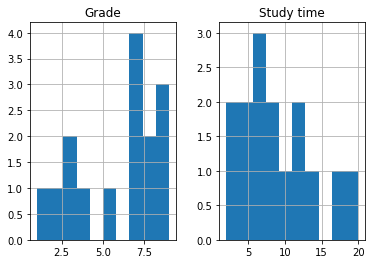

In [133]:
# your code here
time_grades.hist()

#### Is there a correlation between `Study time` and `Grade`? Use both Pearson and Spearman correlations and comment your results.

In [134]:
# your code here
time_grades["Study time"].corr(time_grades["Grade"])

0.7980456073578858

In [141]:
time_grades["Study time"].corr(time_grades["Grade"], method="spearman")

0.819658753036942

In [ ]:
"""
Spearman correlation ranks values and measures the correlation based on this rank which is linear, this is,
whenever a variable is non-linear, this transformation to linear allows to capture correlation, so this may come up
handy in some instances. 
In this case, since Spearman correlation is greater than Pearson one, it might be hinting us that there might be a
slight non-linear relationship between the variables involved. Plotting the values would be a good aid 
to ascertain this matter.
"""

#### Use matplotlib to visually plot `Study time` vs `Grade`. Based on the results of the computed correlation and the plot, what can you say about these 2 variables?

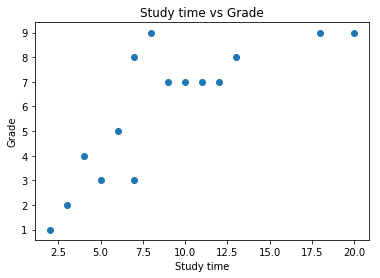

In [139]:
# your code here
plt.scatter(time_grades["Study time"], time_grades["Grade"])
plt.title("Study time vs Grade")
plt.xlabel("Study time")
plt.ylabel("Grade")
plt.show()

In [ ]:
"""
As hinted before, there seems to be a non-linear relationship, since there seems to be one point from which, more
hours of study do not translate into higher grades. 
"""

#### Could you explain the difference between Pearson and Spearman correlations?

In [ ]:
"""
Already explained 3 cells up.
"""